# Time-series


Many generative methods (e.g., genetic algorithms) iteratively improve initial sequences. One may be interested in visualizing the improvement across iterations/generations. Here we will show how do this with seqme.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from seqme import combine_metric_dataframes, compute_metrics, show_table
from seqme.metrics import ID, Uniqueness
from seqme.models import Charge

Let's define a function to plot the time-series later.

In [ ]:
def plot_time_series(df: pd.DataFrame, metric_name: str):
    fig, ax = plt.subplots(figsize=(4, 3))

    model_names = {v[0] for v in df.index}
    for model_name in model_names:
        df_model = df.loc[model_name]
        xs = df_model.index
        vs = df_model[metric_name]["value"]
        dev = df_model[metric_name]["deviation"]

        ax.fill_between(xs, vs - dev, vs + dev, alpha=0.4)
        ax.plot(xs, vs, marker="x", label=model_name)

    objective = df.attrs["objective"][metric_name]
    arrows = {"maximize": "↑", "minimize": "↓"}

    ax.set_xlabel("Timestep")
    ax.set_ylabel(f"{metric_name}{arrows[objective]}")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend()

## Single run

It is possible to define an entry name as a tuple. Here we name an entry using the following format: (model name, timestep).


In [ ]:
sequences = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

Let's define the metrics to compute.


In [ ]:
metrics = [
    ID(predictor=Charge(), name="Gravy", objective="maximize"),
    Uniqueness(),
]

Let's compute the metrics.


In [ ]:
df = compute_metrics(sequences, metrics)

100%|██████████| 12/12 [00:00<00:00, 1921.86it/s, data=('model 2', 3), metric=Uniqueness]


In [ ]:
show_table(df)

Let's visualize the sequences performance at each timestep.

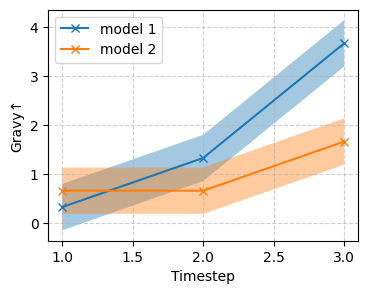

In [ ]:
plot_time_series(df, "Gravy")

## Multiple runs

Let's assume we ran the algorithm multiple times with a different seed each time to compute the deviation.

In [ ]:
metrics = [
    ID(predictor=Charge(), name="Gravy", objective="maximize"),
    Uniqueness(),
]

In [ ]:
sequences_run1 = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_run2 = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_run3 = {
    ("model 1", 1): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 2): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_per_run = [sequences_run1, sequences_run2, sequences_run3]

In [ ]:
df_per_run = [compute_metrics(sequences, metrics) for sequences in sequences_per_run]

100%|██████████| 12/12 [00:00<00:00, 1634.83it/s, data=('model 2', 3), metric=Uniqueness]


Let's create a metric dataframe combining the metric dataframe of each run.

In [ ]:
df_combined_runs = combine_metric_dataframes(df_per_run, on_overlap="mean")

In [ ]:
show_table(df_combined_runs)

Let's visualize the sequences performance at each timestep.

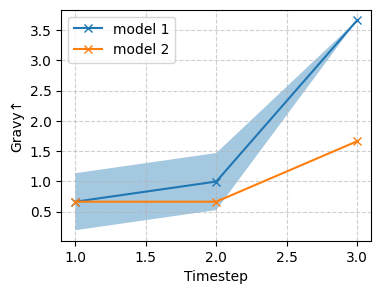

In [ ]:
plot_time_series(df_combined_runs, "Gravy")